<a href="https://colab.research.google.com/github/annalamboglia/Minicontest1/blob/main/Solution_Minicontest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the Train.csv


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
#Link the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the csv

with open("/content/drive/MyDrive/Minicontest1/Train.csv", 'r') as fp:
    df = pd.read_csv(fp)

df

,row ID,PESO_KG,ALTEZZA_M,BMI,base_sx,base_med,base_dx,equ_sx,equ_med,equ_dx,ap_sx,ap_med,ap_dx,tran_sx,tran_med,tran_dx,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,psa_density,FREE_PSA,RATIO,Glicemia,Colesterolo,HDL,LDL,Trigliceridi,Creatinina,CANCER
0,2.0,83,1.70,28.719723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.0,6.35,0.090714,2.24,0.352756,93,204,62,128,68,0.80,0
1,3.0,75,1.78,23.671254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,92.0,7.72,0.083913,1.49,0.193005,112,242,53,174,76,1.00,0
2,4.0,72,1.75,23.510204,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,5.37,0.078971,1.16,0.216015,133,160,35,105,100,1.50,0
3,6.0,72,1.72,24.337480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,6.43,0.128600,1.12,0.174184,196,128,33,56,254,1.31,1
4,8.0,80,1.75,26.122449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,138.0,12.16,0.088116,NaN,NaN,80,204,43,144,155,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,104.0,85,1.75,27.755102,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,62.0,5.20,0.083871,1.36,0.261538,96,189,50,123,79,0.79,1
61,106.0,87,1.75,28.408163,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,32.0,10.74,0.335625,NaN,NaN,101,216,45,123,155,1.00,0
62,107.0,87,1.80,26.851852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,36.0,9.54,0.265000,4.17,0.437107,94,183,51,110,112,8.20,0
63,108.0,54,1.40,27.551020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.55,NaN,2.28,0.410811,146,162,50,77,173,0.84,0


#Dataset

In [ ]:
#Get the number of Cancer or Not
df['CANCER'].value_counts()

1    42
0    23
Name: CANCER, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


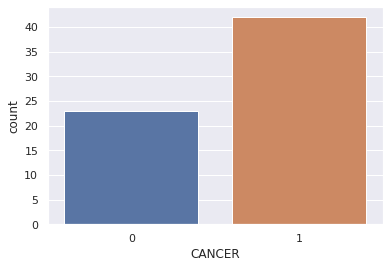

In [ ]:
#Visualize the count
sns.countplot(df['CANCER'], label='count')

In [ ]:
#Look at the data types whitch columns need to be encoded
df.dtypes

row ID               float64
PESO_KG                int64
ALTEZZA_M            float64
BMI                  float64
base_sx              float64
base_med             float64
base_dx              float64
equ_sx               float64
equ_med              float64
equ_dx               float64
ap_sx                float64
ap_med               float64
ap_dx                float64
tran_sx              float64
tran_med             float64
tran_dx              float64
train_nd             float64
TOT_ZONE             float64
VOLUME_PROSTATICO    float64
PSA                  float64
psa_density          float64
FREE_PSA             float64
RATIO                float64
Glicemia               int64
Colesterolo            int64
HDL                    int64
LDL                    int64
Trigliceridi           int64
Creatinina           float64
CANCER                 int64
dtype: object

In [ ]:
#NaN Values
df1 = df[df.isna().any(axis=1)]

df1

,row ID,PESO_KG,ALTEZZA_M,BMI,base_sx,base_med,base_dx,equ_sx,equ_med,equ_dx,ap_sx,ap_med,ap_dx,tran_sx,tran_med,tran_dx,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,psa_density,FREE_PSA,RATIO,Glicemia,Colesterolo,HDL,LDL,Trigliceridi,Creatinina,CANCER
4,8.0,80,1.75,26.122449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,138.0,12.16,0.088116,NaN,NaN,80,204,43,144,155,1.00,1
20,36.0,90,1.78,28.405504,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,66.0,15.43,0.233788,NaN,NaN,95,164,27,108,145,0.84,0
22,39.0,62,1.70,21.453287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,8.00,0.285714,1.20,0.150000,129,220,50,165,117,0.88,1
52,85.0,85,1.72,28.731747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.24,0.007059,NaN,NaN,99,200,42,129,146,0.96,1
54,92.0,70,1.68,24.801587,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.0,1.90,0.034545,NaN,NaN,93,217,63,122,155,1.12,0
56,95.0,65,1.70,22.491349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,45.6,11.02,0.241667,NaN,NaN,76,160,39,123,196,1.00,0
61,106.0,87,1.75,28.408163,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,32.0,10.74,0.335625,NaN,NaN,101,216,45,123,155,1.00,0
63,108.0,54,1.40,27.551020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.55,NaN,2.28,0.410811,146,162,50,77,173,0.84,0


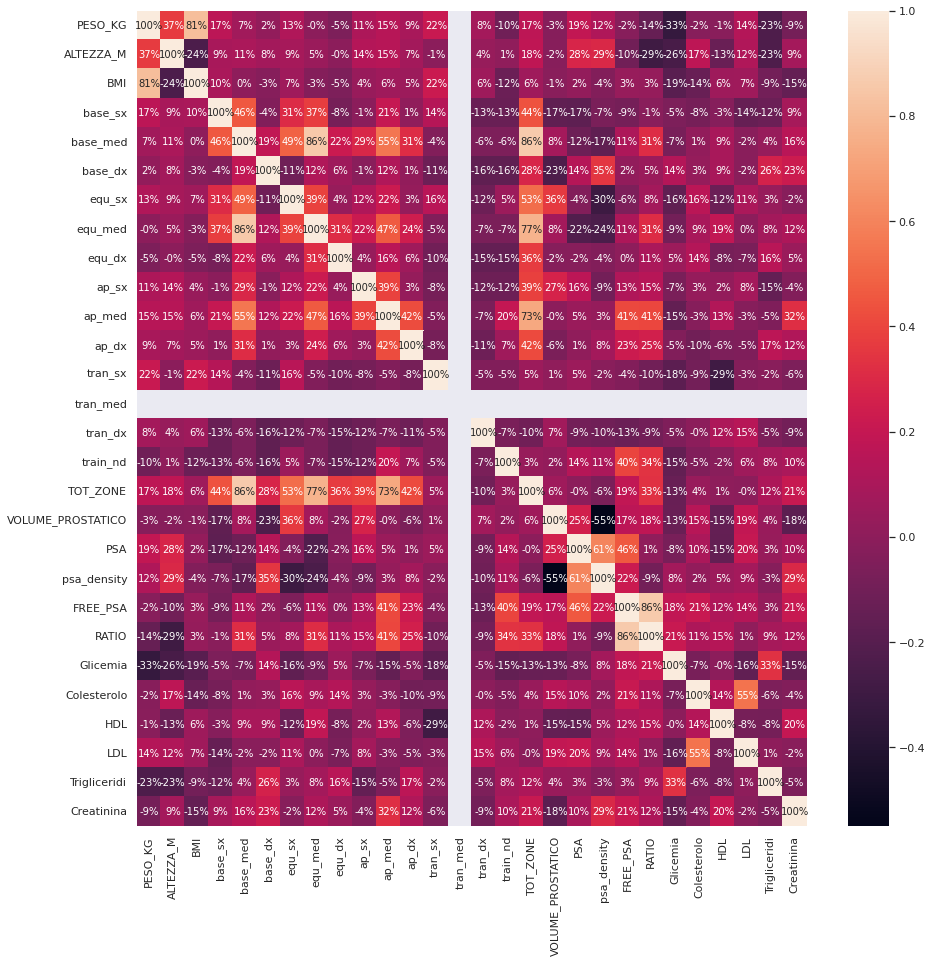

In [ ]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True, fmt='.0%')

#Preprocessing

Constant Column

In [ ]:
df=df.drop(columns=["tran_med"], axis=1)

Some columns give the same information like:

PSA density=PSA/Volume Prostatico
BMI=BMI = peso in kg / (statura in metri * statura in metri)

In [ ]:
df=df.drop(columns=["PESO_KG","ALTEZZA_M","psa_density"], axis=1)

Also FREE PSA e PSA TOTALE

RATIO=FREE PSA/PSA

In [ ]:
#df=df.drop(columns=["PSA"], axis=1)

#Also TOT_ZONE= base + equ + ap + tran

In [ ]:
df=df.drop(columns=["base_dx","ap_dx","tran_sx","tran_dx"])

Colesterolo = HDL + LDL 

In [ ]:
df=df.drop(columns=['Colesterolo'])

#Splitting X=features e Y=target

In [ ]:
X=df.drop(columns=["row ID","CANCER"])
Y=df["CANCER"]

In [ ]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=0)

In [ ]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.40, stratify=Y_train, random_state=0)

#Missing Value

Missing Value on train

In [ ]:
df1 = X_train[X_train.isna().any(axis=1)]

df1

,BMI,base_sx,base_med,equ_sx,equ_med,equ_dx,ap_sx,ap_med,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,FREE_PSA,RATIO,Glicemia,HDL,LDL,Trigliceridi,Creatinina
22,21.453287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,8.00,1.20,0.150000,129,50,165,117,0.88
63,27.551020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.55,2.28,0.410811,146,50,77,173,0.84
54,24.801587,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,55.0,1.90,NaN,NaN,93,63,122,155,1.12
4,26.122449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,138.0,12.16,NaN,NaN,80,43,144,155,1.00
52,28.731747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.24,NaN,NaN,99,42,129,146,0.96


In [ ]:
import statistics
print(statistics.median(X_train["FREE_PSA"]))
print(statistics.median(X_train["RATIO"]))

1.07
0.1601796407185629


In [ ]:
PSA_Median=statistics.median(X_train["FREE_PSA"])
Ratio_median=statistics.median(X_train["RATIO"])

In [ ]:
X_train["FREE_PSA"].fillna(PSA_Median)
X_train["RATIO"].fillna(Ratio_median)
X_train=X_train.fillna(-1)

Missing Value on Validation

In [ ]:
df1 = X_validation[X_validation.isna().any(axis=1)]

df1

,BMI,base_sx,base_med,equ_sx,equ_med,equ_dx,ap_sx,ap_med,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,FREE_PSA,RATIO,Glicemia,HDL,LDL,Trigliceridi,Creatinina
20,28.405504,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,66.0,15.43,NaN,NaN,95,27,108,145,0.84


In [ ]:
X_validation["FREE_PSA"].fillna(PSA_Median)
X_validation["RATIO"].fillna(Ratio_median)
X_validation=X_validation.fillna(-1)

Missing value on test

In [ ]:
df1 = X_test[X_test.isna().any(axis=1)]

df1

,BMI,base_sx,base_med,equ_sx,equ_med,equ_dx,ap_sx,ap_med,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,FREE_PSA,RATIO,Glicemia,HDL,LDL,Trigliceridi,Creatinina
56,22.491349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,45.6,11.02,NaN,NaN,76,39,123,196,1.0
61,28.408163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,32.0,10.74,NaN,NaN,101,45,123,155,1.0


In [ ]:
X_test["FREE_PSA"].fillna(PSA_Median)
X_test["RATIO"].fillna(Ratio_median)
X_test=X_test.fillna(-1)

#Normalization

In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
X_train.shape

(34, 19)

#Convert in np array

In [ ]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

#Grid Search

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
pipelineSVC = make_pipeline(SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,100],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,100],
                    'svc__degree': [1,2,3,4,5,6,7,8,9,10],
                    'svc__kernel': ['poly']
                 },
                  {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,100],
                    'svc__kernel': ['linear']
                  }
                  ]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, Y_train)
#
# Print the training score of the best model
#
print(gsSVC.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC.best_params_)
#
# Print the model score on the test data using GridSearchCV score method
#
print('Test accuracy: %.3f' % gsSVC.score(X_validation, Y_validation))
#
# Print the model score on the test data using Best estimator instance
#
clfSVC = gsSVC.best_estimator_
print('Test accuracy: %.3f' % clfSVC.score(X_validation, Y_validation))

0.8833333333333332
{'svc__C': 100, 'svc__degree': 3, 'svc__kernel': 'poly'}
Test accuracy: 0.556
Test accuracy: 0.556


In [ ]:
from sklearn.linear_model import LogisticRegression
pipelineLR = make_pipeline(LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,100,200],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, Y_train)
#
# Print the training score of the best model
#
print(gsLR.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR.best_params_)
#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_validation, Y_validation))

0.7166666666666666
{'logisticregression__C': 10.0}
Test accuracy: 0.722


Provo vari modelli

In [ ]:
#Create a function for the models
def models(X_train,Y_train):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=10)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #Support Vector Machine
  from sklearn.svm import SVC
  support_vector_machine = SVC(C=100, kernel='linear')
  support_vector_machine.fit(X_train, Y_train)

  #NaiveBayes
  from sklearn.naive_bayes import GaussianNB
  NB = GaussianNB()
  NB.fit(X_train, Y_train)

  #MLP
  from sklearn.neural_network import MLPClassifier
  # Create model object
  Mlp = MLPClassifier(random_state=0, verbose=False, learning_rate_init=0.01)
  Mlp.fit(X_train, Y_train)

  print("[0] Logistic Regression Training Accuracy: ", log.score(X_train,Y_train))
  print("[1] Decision Tree Training Accuracy: ", tree.score(X_train,Y_train))
  print("[2] Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
  print("[3] Nayve Bayes Training Accuracy: ", NB.score(X_train,Y_train))
  print("[4] Mlp Training Accuracy: ", Mlp.score(X_train,Y_train))
  
  return log,tree,support_vector_machine,NB,Mlp

In [ ]:
#Get all of the models
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy:  1.0
[1] Decision Tree Training Accuracy:  1.0
[2] Support Vector Machine Training Accuracy:  1.0
[3] Nayve Bayes Training Accuracy:  0.7941176470588235
[4] Mlp Training Accuracy:  1.0


In [ ]:
def Matrix(ytest,ypred):
  mat = confusion_matrix(ytest, ypred, normalize = 'true') # evaluate
  plt.figure(figsize=(12, 8), dpi=70)
  sns.heatmap(mat.T*100, square=True, annot=True, vmin=0.0, vmax=100.0, fmt='.1f', cbar=True) # plot via seaborn
  sns.set(font_scale=1.4) # for label size
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label');
  plt.title('Confusion Matrix of model '+ str(i))

In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

for i in range(len(model)):
  print("Model: " + str(i))
  ypred = model[i].predict(X_validation)
  cm = confusion_matrix(Y_validation,ypred)
  print(cm)
  print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
  print("Classification Report : ", classification_report(Y_validation, ypred))
  #Matrix(Y_test,ypred)
  #plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Model: 0
[[ 2  4]
 [ 1 11]]

Accuracy :  0.7222222222222222
Classification Report :                precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.73      0.92      0.81        12

    accuracy                           0.72        18
   macro avg       0.70      0.62      0.63        18
weighted avg       0.71      0.72      0.69        18

Model: 1
[[3 3]
 [3 9]]

Accuracy :  0.6666666666666666
Classification Report :                precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.75      0.75      0.75        12

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18

Model: 2
[[ 2  4]
 [ 1 11]]

Accuracy :  0.7222222222222222
Classification Report :                precision    recall  f1-score   support

           0       0.67      0.33      0

In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

for i in range(len(model)):
  print("Model: " + str(i))
  ypred = model[i].predict(X_test)
  cm = confusion_matrix(Y_test,ypred)
  print(cm)
  print("\nAccuracy : ", accuracy_score(Y_test, ypred))
  print("Classification Report : ", classification_report(Y_test, ypred))
  #Matrix(Y_test,ypred)
  #plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix


Model: 0
[[ 3  4]
 [ 3 10]]

Accuracy :  0.65
Classification Report :                precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20

Model: 1
[[ 5  2]
 [ 2 11]]

Accuracy :  0.8
Classification Report :                precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20

Model: 2
[[ 4  3]
 [ 3 10]]

Accuracy :  0.7
Classification Report :                precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.77   

In [ ]:
pred=model[3].predict(X_test)
print(pred)
print()
print(Y_test)

[1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0]

[1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1]


#Andiamo più a fuoco sulla SVM




In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC(C=10, kernel='linear', random_state=0)
support_vector_machine.fit(X_train, Y_train)

SVC(C=10, kernel='linear', random_state=0)

In [ ]:
print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
ypred = support_vector_machine.predict(X_validation)
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Support Vector Machine Training Accuracy:  1.0
[[ 2  4]
 [ 1 11]]

Accuracy :  0.7222222222222222
Classification Report :                precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.73      0.92      0.81        12

    accuracy                           0.72        18
   macro avg       0.70      0.62      0.63        18
weighted avg       0.71      0.72      0.69        18



In [ ]:
print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
ypred = support_vector_machine.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix



Support Vector Machine Training Accuracy:  1.0
[[ 4  3]
 [ 3 10]]

Accuracy :  0.7
Classification Report :                precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.77      0.77      0.77        13

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20



In [ ]:
pred=support_vector_machine.predict(X_test)
print(pred)
print()

[1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0]



#Andiamo più a fuoco sulla Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=10)
log.fit(X_train,Y_train)

LogisticRegression(C=10, random_state=1)

In [ ]:
print("Logistic Regression Training Accuracy: ", log.score(X_train,Y_train))
ypred = log.predict(X_validation)
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Logistic Regression Training Accuracy:  1.0
[[ 2  4]
 [ 1 11]]

Accuracy :  0.7222222222222222
Classification Report :                precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.73      0.92      0.81        12

    accuracy                           0.72        18
   macro avg       0.70      0.62      0.63        18
weighted avg       0.71      0.72      0.69        18



In [ ]:
print("Logistic Regression Training Accuracy: ", log.score(X_train,Y_train))
ypred = log.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Logistic Regression Training Accuracy:  1.0
[[ 3  4]
 [ 3 10]]

Accuracy :  0.65
Classification Report :                precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



#Definition

In [ ]:
df_1=pd.DataFrame(X_train)
df_2=pd.DataFrame(X_validation)

X_n=df_1.append(df_2, ignore_index=True)

df_1=pd.DataFrame(Y_train)
df_2=pd.DataFrame(Y_validation)

Y_n=df_1.append(df_2, ignore_index=True)

X_n=np.array(X_n)
Y_n=np.array(Y_n)

X_n_test=X_test
Y_n_test=Y_test

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC(C=1, kernel='linear', random_state=0)
support_vector_machine.fit(X_n, Y_n)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_n,Y_n))
ypred = support_vector_machine.predict(X_n_test)
cm = confusion_matrix(Y_n_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_n_test, ypred))
print("Classification Report : ", classification_report(Y_n_test, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Support Vector Machine Training Accuracy:  0.8653846153846154
[[ 4  3]
 [ 1 12]]

Accuracy :  0.8
Classification Report :                precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=10)
log.fit(X_n,Y_n)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=1)

In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
print("Logistic Regression Accuracy: ", log.score(X_n,Y_n))
ypred = log.predict(X_n_test)
cm = confusion_matrix(Y_n_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_n_test, ypred))
print("Classification Report : ", classification_report(Y_n_test, ypred))
#Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Logistic Regression Accuracy:  0.9423076923076923
[[ 4  3]
 [ 1 12]]

Accuracy :  0.8
Classification Report :                precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



#Provo a dare un risultato

In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest1/Test.csv", 'r') as fp:
    df_test = pd.read_csv(fp)

df_test

,row ID,PESO_KG,ALTEZZA_M,BMI,base_sx,base_med,base_dx,equ_sx,equ_med,equ_dx,ap_sx,ap_med,ap_dx,tran_sx,tran_med,tran_dx,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,psa_density,FREE_PSA,RATIO,Glicemia,Colesterolo,HDL,LDL,Trigliceridi,Creatinina
0,1.0,100,1.70,34.602076,0,0,0,1,0,0,0,0,0,0,1,0,0,2,84.0,4.26,0.050714,1.3000,0.305164,101,194,28,70,103,1.00
1,5.0,80,1.80,24.691358,0,0,0,1,0,0,0,0,0,0,0,0,0,1,78.0,5.45,0.069872,1.0200,0.187156,80,203,53,123,144,1.10
2,7.0,72,1.69,25.209201,0,0,0,0,0,0,1,0,0,0,0,0,0,1,35.0,2.18,0.062286,0.4700,0.215596,95,115,36,75,91,1.31
3,9.0,76,1.75,24.816327,0,0,0,0,0,0,0,0,1,0,0,0,0,1,27.5,6.77,0.246182,1.0500,0.155096,89,177,39,123,128,1.00
4,10.0,90,1.67,32.270788,0,0,1,0,0,0,0,0,0,0,0,0,0,1,22.0,8.74,0.397273,0.6900,0.078947,100,226,53,153,146,0.91
5,11.0,91,1.84,26.878544,0,0,1,0,0,0,0,0,0,0,0,0,0,1,35.0,7.30,0.208571,0.7300,0.100000,112,166,62,144,112,1.00
6,16.0,91,1.75,29.714286,0,0,0,0,0,0,1,0,0,0,0,0,0,1,62.0,6.20,0.100000,0.8060,0.130000,99,111,39,122,90,0.91
7,18.0,87,1.72,29.407788,0,0,0,0,0,0,1,0,0,0,0,0,0,1,25.0,5.90,0.236000,0.5310,0.090000,95,222,45,108,153,1.22
8,19.0,75,1.80,23.148148,0,0,1,0,0,1,0,0,1,0,0,0,0,3,35.0,10.98,0.313714,1.1900,0.108379,116,166,53,106,92,0.81
9,25.0,92,1.80,28.395062,0,0,1,0,0,0,0,0,0,0,0,0,0,1,45.0,1.50,0.033333,NaN,NaN,95,168,45,130,95,1.00


In [ ]:
df_test.shape

(44, 29)

In [ ]:
Test=df_test.drop(columns=["row ID"]) #Features

In [ ]:
Test["FREE_PSA"].fillna(PSA_Median)
Test["RATIO"].fillna(Ratio_median)
Test=Test.fillna(-1)

In [ ]:
df1 = Test[Test.isna().any(axis=1)]

df1

,PESO_KG,ALTEZZA_M,BMI,base_sx,base_med,base_dx,equ_sx,equ_med,equ_dx,ap_sx,ap_med,ap_dx,tran_sx,tran_med,tran_dx,train_nd,TOT_ZONE,VOLUME_PROSTATICO,PSA,psa_density,FREE_PSA,RATIO,Glicemia,Colesterolo,HDL,LDL,Trigliceridi,Creatinina


In [ ]:
Test_finale=Test.drop(columns=["tran_med","PESO_KG","ALTEZZA_M","psa_density","base_dx","ap_dx","tran_sx","tran_dx",'Colesterolo'], axis=1)

In [ ]:
Test_finale.shape

(44, 19)

#Normalizzo

In [ ]:
X=df.drop(columns=["row ID","CANCER"])
Y=df["CANCER"]

X["FREE_PSA"].fillna(PSA_Median)
X["RATIO"].fillna(Ratio_median)
X=X.fillna(-1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Normalizzato = sc.fit_transform(X)
Test_finale_Normalizzato = sc.transform(Test_finale)

#Provo la SVM

In [ ]:
from sklearn.svm import SVC
support_vector_machine=SVC(kernel='linear', C=10, random_state=0)
support_vector_machine.fit(X_Normalizzato,Y)

SVC(C=10, kernel='linear', random_state=0)

#Provo una regressione logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2', random_state=20, solver='lbfgs', C=10)
log.fit(X_train,Y_train)


LogisticRegression(C=10, random_state=20)

#Creo Il risultato finale

In [ ]:
Test_finale_array=np.array(Test_finale_Normalizzato)

In [ ]:
Test_finale_array.shape

(44, 19)

In [ ]:
#pred=support_vector_machine.predict(Test_finale_array)
pred=log.predict(Test_finale_array)

print(pred)






[0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 1 0 0 1]


In [ ]:
id=np.array(df_test["row ID"])  #id

id

array([  1.,   5.,   7.,   9.,  10.,  11.,  16.,  18.,  19.,  25.,  26.,
        29.,  30.,  31.,  34.,  37.,  40.,  41.,  44.,  45.,  46.,  48.,
        49.,  52.,  53.,  57.,  62.,  63.,  72.,  77.,  79.,  82.,  86.,
        87.,  89.,  90.,  91.,  93.,  98., 100., 101., 102., 103., 105.])

In [ ]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

In [ ]:
colonna_2=pd.DataFrame(pred, columns=['CANCER'])

colonna_2


In [ ]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [ ]:
horizontal_concat

In [ ]:
horizontal_concat.to_csv('Risultato_Log.csv', index = False)